In [2]:
from cortexlib.utils.plotting import simclr_colours, vgg19_colours, gabor_filter_colours
from cortexlib.utils import file as futils
from cortexlib.utils.logging import Logger
import pandas as pd
import matplotlib.pyplot as plt

logger = Logger()

In [3]:
MOUSE_ID = futils.get_mouse_id()
logger.info(f"This notebook is running for mouse {MOUSE_ID}")

18:04:43 | INFO     | ℹ️ This notebook is running for mouse m03_d4


In [4]:
simclr_fev_results = futils.read_json_file_as_dataframe('../04_simclr_neural_pc1/prediction.json')
best_fev_per_simclr_layer = simclr_fev_results.loc[simclr_fev_results.groupby("layer")["mean_fev"].idxmax()]

best_fev_per_simclr_layer

,layer,n_pcs,test_r2,mean_fev
44,fc,500.0,0.409375,0.432509
1,layer1,10.0,0.383644,0.405533
11,layer2,20.0,0.460465,0.486069
21,layer3,50.0,0.462741,0.488455
34,layer4,400.0,0.431894,0.456116


In [5]:
vgg19_fev_results = futils.read_json_file_as_dataframe('../06_vgg19_neural_pc1/prediction.json')
best_fev_per_vgg19_layer = vgg19_fev_results.loc[vgg19_fev_results.groupby("layer")["mean_fev"].idxmax()]

best_fev_per_vgg19_layer

,layer,n_pcs,test_r2,mean_fev
0,conv2_2,NaN,0.317294,0.335975
5,conv3_4,NaN,0.298289,0.316051
10,conv4_4,NaN,0.278397,0.295198
15,conv5_4,NaN,0.235164,0.249873
20,fc2,NaN,0.207882,0.221273


In [6]:
gabor_fev_results = futils.read_json_file_as_dataframe('../02_gabor_neural_pc1/prediction.json')
best_fev_per_gabor_filter_bank = gabor_fev_results.loc[gabor_fev_results.groupby("filter")["mean_fev"].idxmax()]

best_fev_per_gabor_filter_bank

,filter,n_pcs,test_r2,mean_fev
14,gabor_large,2.0,0.001244,0.004643
8,gabor_medium,2.0,0.004206,0.007748
2,gabor_small,2.0,0.003115,0.006604


In [7]:
# Add model identifiers
best_fev_per_simclr_layer['model'] = 'SimCLR'
best_fev_per_vgg19_layer['model'] = 'VGG19'
best_fev_per_gabor_filter_bank['model'] = 'Gabor'

# Rename layer/filter column to a common name
best_fev_per_simclr_layer = best_fev_per_simclr_layer.rename(columns={"layer": "representation"})
best_fev_per_vgg19_layer = best_fev_per_vgg19_layer.rename(columns={"layer": "representation"})
best_fev_per_gabor_filter_bank = best_fev_per_gabor_filter_bank.rename(columns={"filter": "representation"})

# Combine all into a single DataFrame
combined = pd.concat([
    best_fev_per_simclr_layer,
    best_fev_per_vgg19_layer,
    best_fev_per_gabor_filter_bank
])

combined

,representation,n_pcs,test_r2,mean_fev,model
44,fc,500.0,0.409375,0.432509,SimCLR
1,layer1,10.0,0.383644,0.405533,SimCLR
11,layer2,20.0,0.460465,0.486069,SimCLR
21,layer3,50.0,0.462741,0.488455,SimCLR
34,layer4,400.0,0.431894,0.456116,SimCLR
0,conv2_2,NaN,0.317294,0.335975,VGG19
5,conv3_4,NaN,0.298289,0.316051,VGG19
10,conv4_4,NaN,0.278397,0.295198,VGG19
15,conv5_4,NaN,0.235164,0.249873,VGG19
20,fc2,NaN,0.207882,0.221273,VGG19


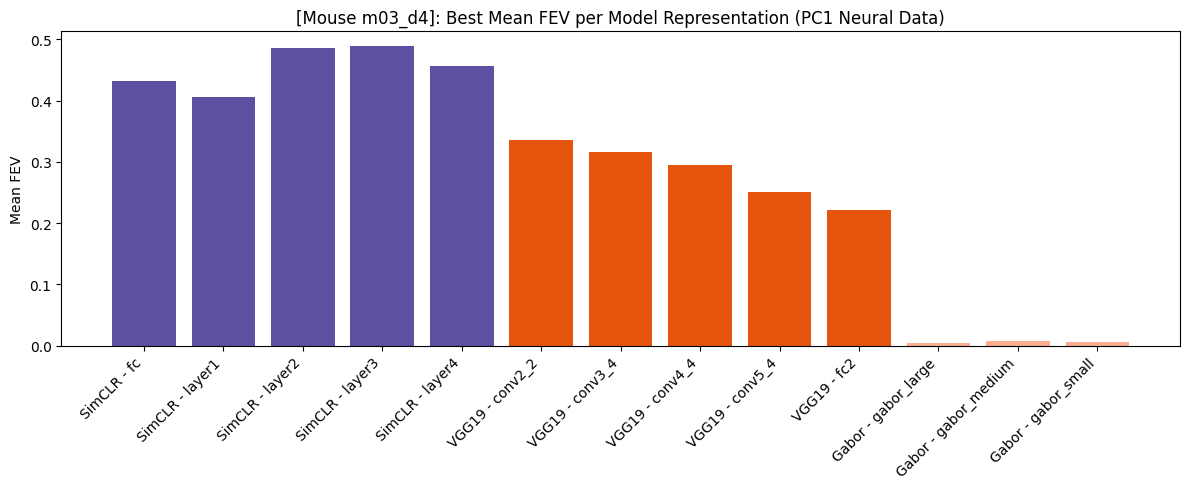

In [8]:
# Create a unique label for plotting
combined['label'] = combined['model'] + ' - ' + combined['representation']

colour = {
    'SimCLR': simclr_colours['layer3'],
    'VGG19': vgg19_colours['conv4_4'],
    'Gabor': gabor_filter_colours['gabor_medium']
}
colours = combined['model'].map(colour)

plt.figure(figsize=(12, 5))
plt.bar(combined['label'], combined['mean_fev'], color=colours)
plt.ylabel('Mean FEV')
plt.title(f'[Mouse {MOUSE_ID}]: Best Mean FEV per Model Representation (PC1 Neural Data)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()